# KDD 2009 Challenge

Este notebook foi criado para criação do modelo de aprendizagem de máquina pára KDD Cup 2009: Custumer relationship prediction, cedidos pela empresa de telecomunicação francesa Orange.

O objetivo é predizer o churn, appentency e upselling. Conforme explicações enviadas. 


In [ ]:
## Carregando os pacotes, bancos de dados e labels

In [3]:
import os as os
import ipywidgets as widgets
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
import pydotplus
from tpot import TPOTClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from IPython.display import Image 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,roc_auc_score)

%matplotlib inline

C:\Users\Samsung\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [4]:
df = pd.read_csv("df_process.csv")

df.head(5)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,142.0,38418.0,0.0,0.0
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,32.0,238572.0,0.0,0.0
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,206.0,434946.0,0.0,0.0
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0.0
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,2.0,0.0,0.0,0.0


In [5]:
path_data = 'C:/Users/Samsung/Documents/kdd_cup'
churn = pd.read_csv(f'{path_data}''/orange_small_train_churn.labels', sep = '/n', header = None)
appentency = pd.read_csv(f'{path_data}''/orange_small_train_appetency.labels', sep = '/n', header = None)
upsell = pd.read_csv(f'{path_data}''/orange_small_train_upselling.labels', sep = '/n', header = None)

C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engin

## Churn

### Dividindo os dados em treino, teste e validação

In [7]:
y = churn
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print("Quantidade Observações:\nTreino: {tr}\nTeste: {te}\nValidação: {v}".format(tr = X_train.shape[0],
                                                                                 te = X_test.shape[0],
                                                                                 v = X_val.shape[0]))

Quantidade Observações:
Treino: 36000
Teste: 10000
Validação: 4000


### Criando um modelo utilizando o Auto ML

Para um primeiro prototipo, aplicaremos o framework tplot, construido sobre o sklearn, que testa vários tipos de modelos de classificação e retorna uma configuração inicial para construção de um modelo

In [12]:
#Criando o learner
tp = TPOTClassifier(
    generations=2,
    population_size=10,
    cv=2,
    n_jobs=-1,
    random_state=0,
    verbosity=0
)

In [13]:
#Treinando os dados com automl
tp.fit(X_train, np.array(y_train).ravel())

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=2,
        disable_update_check=False, early_stop=None, generations=2,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=10,
        random_state=0, scoring=None, subsample=1.0, template='RandomTree',
        use_dask=False, verbosity=0, warm_start=False)

In [15]:
#printando o score do modelo
print("Score: "+str(tp.score(X_test, np.array(y_test).ravel())))

Score: 0.9232


In [16]:
#exportanod o modelo
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=0)

# Average CV score on the training set was:0.927416667985854
exported_pipeline = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.05, min_samples_leaf=10, min_samples_split=13, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



### Criando o modelo sugerido

In [9]:
#criação do learner
et = ExtraTreesClassifier(bootstrap=True,
                          criterion="entropy",
                          max_features=0.05,
                          min_samples_leaf=10,
                          min_samples_split=13, 
                          n_estimators=100)

In [10]:
#Treinando o modelo
et.fit(X_train, np.array(y_train).ravel())
y_pred_val = et.predict(X_val)
y_pred_train = et.predict(X_train)
y_pred_test = et.predict(X_test)
print("Score: "+str(et.score(X_test, np.array(y_test).ravel())))

Score: 0.9232


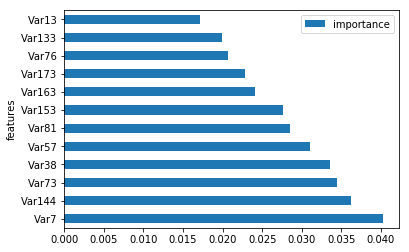

In [159]:
#Plotando a importancia das features na predição.
importance = pd.DataFrame({'features': list(X_train.columns), 'importance': list(et.feature_importances_)})
importance.sort_values(by='importance', ascending=False).head(12).plot.barh(x='features')

In [18]:
#Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]        
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)

In [19]:
#Função para plotar matriz de confusão em paralelo
def plotar_paralelo(lista_resultados):
    
    wids = []
    for titulo, y_true, y_pred in lista_resultados:
        w = widgets.Output()
        wids.append(w)
        
        with w:
            plot_confusion_matrix(y_true, y_pred, normalize=False, classes=['Não', 'Sim'],
                      title=titulo)
            plt.show()
    
    hbox = widgets.HBox(wids)
    return hbox

In [11]:
resultados = [('Confusion Matrix: Treino', y_train, y_pred_train),
              ('Confusion Matrix: Validação', y_val, y_pred_val),
              ('Confusion Matrix: Teste', y_test, y_pred_test)]
plotar_paralelo(resultados)

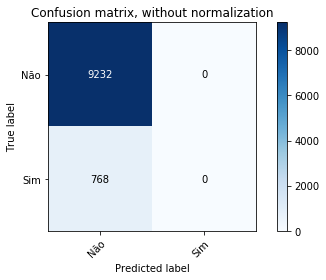

In [21]:
#Para vizualição da confusion matrix sem widget
plot_confusion_matrix(y_test,y_pred_test, classes = ["Não", "Sim"])

Observa-se no gráfico acima que o modelo está simplesmente categorizando todos as predições como "Não". 

Igualaremos a quantidade de positivos e negativos e criaremos outro modelo.


Area under ROC curve = 0.50


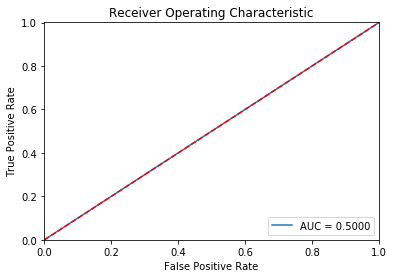

In [22]:
# ROC curve and Area-Under-Curve (AUC)

fpr_gb, tpr_gb, _ = roc_curve(y_val, y_pred_val)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gb, tpr_gb, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Conforme esperado temos um AUC de 0.50

In [11]:
#plotando precisão, recall e f1-score:
print(classification_report(y_test, y_pred_test))

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          -1       0.92      1.00      0.96      9232
           1       0.00      0.00      0.00       768

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.85      0.92      0.89     10000



### Oversampling

In [23]:
y = churn
X = df
#Criando o novo data frame com os dados balanceados
y.columns = ["churn"]
df_churn = pd.concat([df,y], axis = 1)

df_churn_main = df_churn[df_churn.churn == -1]
df_churn_catover = df_churn[df_churn.churn == 1]

df_churn_oversample = resample(df_churn_catover,
                               replace = True,
                               n_samples = df_churn_main.shape[0],
                               random_state = 42)

df_churn_oversample = pd.concat([df_churn_oversample, df_churn_main])

In [24]:
#Recriando a base de treino e testes

y = df_churn_oversample['churn']
X = df_churn_oversample.drop(['churn'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print("Quantidade Observações:\nTreino: {tr}\nTeste: {te}\nValidação: {v}".format(tr = X_train.shape[0],
                                                                                 te = X_test.shape[0],
                                                                                 v = X_val.shape[0]))



Quantidade Observações:
Treino: 66711
Teste: 18532
Validação: 7413


In [25]:
#Preprocessing

X_train = X_train.values
X_test = X_test.values
X_val = X_val.values

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
X_val = preprocessing.scale(X_val)


In [26]:
#criação do learner
et = ExtraTreesClassifier(bootstrap=True,
                          criterion="entropy",
                          max_features=0.05,
                          min_samples_leaf=10,
                          min_samples_split=13, 
                          n_estimators=100)

In [27]:
#Treinando o modelo
et.fit(X_train, np.array(y_train).ravel())
y_pred_val = et.predict(X_val)
y_pred_train = et.predict(X_train)
y_pred_test = et.predict(X_test)
print("Score: "+str(et.score(X_test, np.array(y_test).ravel())))

Score: 0.5863371465573063


In [28]:
#Plotando a confusion matrix

resultados = [('Confusion Matrix: Treino', y_train, y_pred_train),
              ('Confusion Matrix: Validação', y_val, y_pred_val),
              ('Confusion Matrix: Teste', y_test, y_pred_test)]
plotar_paralelo(resultados)

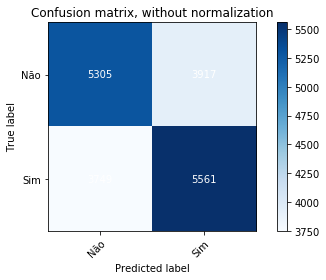

In [29]:
#Para vizualição da confusion matrix sem widget
plot_confusion_matrix(y_test,y_pred_test, classes = ["Não", "Sim"])

Area under ROC curve = 0.58


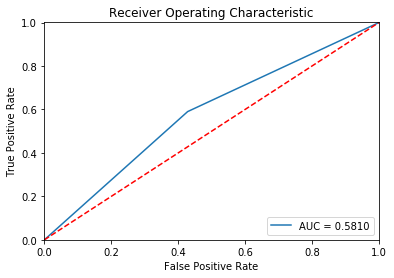

In [30]:
# Plotando o AUC

fpr_gb, tpr_gb, _ = roc_curve(y_val, y_pred_val)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gb, tpr_gb, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [31]:
#plotando precisão, recall e f1-score:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.59      0.58      0.58      9222
           1       0.59      0.60      0.59      9310

   micro avg       0.59      0.59      0.59     18532
   macro avg       0.59      0.59      0.59     18532
weighted avg       0.59      0.59      0.59     18532



Aplicando o oversampling observamos que o modelo começa a ficar mais coerente.

## Appentency

### Oversampling

In [32]:
#Criando o dataframe com oversampling
df = pd.read_csv("df_process.csv")
y = appentency

y.columns = ["appentency"]
df_appentency = pd.concat([df,y], axis = 1)

df_appentency_main = df_appentency[df_appentency.appentency == -1]
df_appentency_catover = df_appentency[df_appentency.appentency == 1]

df_appentency_oversample = resample(df_appentency_catover,
                               replace = True,
                               n_samples = df_appentency_main.shape[0],
                               random_state = 42)

df_appentency_oversample = pd.concat([df_appentency_oversample, df_appentency_main])

In [33]:
#Criando a base de treino, testes e validação

y = df_appentency_oversample['appentency']
X = df_appentency_oversample.drop(['appentency'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print("Quantidade Observações:\nTreino: {tr}\nTeste: {te}\nValidação: {v}".format(tr = X_train.shape[0],
                                                                                 te = X_test.shape[0],
                                                                                 v = X_val.shape[0]))

Quantidade Observações:
Treino: 70718
Teste: 19644
Validação: 7858


In [68]:
#Preprocessing

X_train = X_train.values
X_test = X_test.values
X_val = X_val.values

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
X_val = preprocessing.scale(X_val)

#### Random forest

In [35]:
# Vamos criar um modelo utilizando Random Forest para ver a diferença
rf = RandomForestClassifier(bootstrap=True, 
                            criterion="entropy", 
                            max_features=0.15000000000000002, 
                            min_samples_leaf=1, 
                            min_samples_split=14, 
                            n_estimators=100)

In [36]:
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Score: "+str(rf.score(X_test, np.array(y_test).ravel())))

Score: 0.6208002443494197


In [37]:
resultados = [('Confusion Matrix: Treino', y_train, y_pred_train),
              ('Confusion Matrix: Validação', y_val, y_pred_val),
              ('Confusion Matrix: Teste', y_test, y_pred_test)]
plotar_paralelo(resultados)

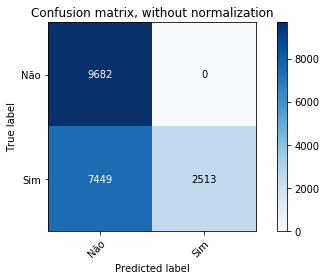

In [38]:
#Para vizualição da confusion matrix sem necessidade do pacote widget
plot_confusion_matrix(y_test,y_pred_test, classes = ["Não", "Sim"])

Area under ROC curve = 0.65


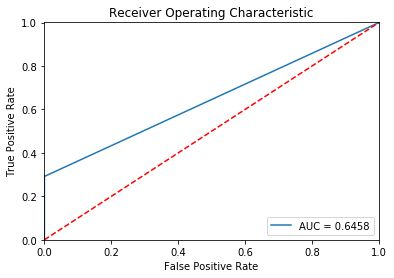

In [39]:
# ROC curve and Area-Under-Curve (AUC)

fpr_gb, tpr_gb, _ = roc_curve(y_val, y_pred_val)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gb, tpr_gb, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [40]:
#plotando precisão, recall e f1-score:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.57      1.00      0.72      9682
           1       1.00      0.25      0.40      9962

   micro avg       0.62      0.62      0.62     19644
   macro avg       0.78      0.63      0.56     19644
weighted avg       0.79      0.62      0.56     19644



### Utilizando o Algoritmo de AutoML

In [231]:
tp = TPOTClassifier(
    generations=2,
    population_size=10,
    cv=2,
    n_jobs=-1,
    random_state=0,
    verbosity=0
)

In [232]:
tp.fit(X_train, np.array(y_train).ravel())

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=2,
        disable_update_check=False, early_stop=None, generations=2,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=10,
        random_state=0, scoring=None, subsample=1.0, template='RandomTree',
        use_dask=False, verbosity=0, warm_start=False)

In [233]:
print("Score: "+str(tp.score(X_test, np.array(y_test).ravel())))

Score: 0.9492465892893505


In [234]:
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=0)

# Average CV score on the training set was:0.9941740433835798
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.9000000000000001, min_samples_leaf=4, min_samples_split=13, n_estimators=100)),
    GaussianNB()
)

exported_pipeline.fit(training_features, traini

In [56]:
#criando o modelo sugerido
md = make_pipeline(StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False,
                                                                    criterion="entropy",
                                                                    max_features=0.9000000000000001,
                                                                    min_samples_leaf=4,
                                                                    min_samples_split=13,
                                                                    n_estimators=100)),
                   GaussianNB())

In [57]:
md.fit(X_train, y_train)
y_pred_valid = md.predict(X_val)
y_pred_train = md.predict(X_train)
y_pred_test = md.predict(X_test)
print("Score: "+str(md.score(X_test, np.array(y_test).ravel())))

Score: 0.9971492567705151


In [58]:
resultados = [('Confusion Matrix: Treino', y_train, y_pred_train),
              ('Confusion Matrix: Validação', y_val, y_pred_val),
              ('Confusion Matrix: Teste', y_test, y_pred_test)]
plotar_paralelo(resultados)

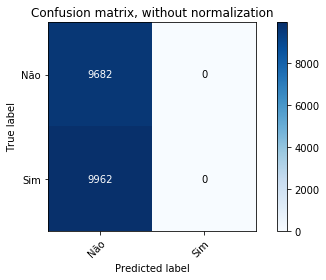

In [59]:
#Confusion matrix
plot_confusion_matrix(y_test,y_pred_test, classes = ["Não", "Sim"])

Area under ROC curve = 0.50


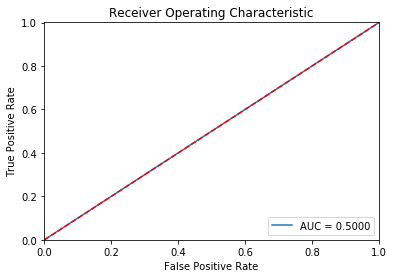

In [60]:
# ROC curve and Area-Under-Curve (AUC)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_test)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gb, tpr_gb, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [46]:
#plotando precisão, recall e f1-score:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.57      1.00      0.72      9682
           1       1.00      0.25      0.40      9962

   micro avg       0.62      0.62      0.62     19644
   macro avg       0.78      0.63      0.56     19644
weighted avg       0.79      0.62      0.56     19644



O modelo sugerido somente está classificando as observações como "Não".

## Upselling

In [69]:
#criando os objetos com os dados
df = pd.read_csv("df_process.csv")
y = upsell

In [70]:
#realizando o upsampling nos dados
y.columns = ["upsell"]
df_upsell = pd.concat([df,y], axis = 1)

df_upsell_main = df_upsell[df_upsell.upsell == -1]
df_upsell_catover = df_upsell[df_upsell.upsell == 1]

df_upsell_oversample = resample(df_upsell_catover,
                               replace = True,
                               n_samples = df_upsell_main.shape[0],
                               random_state = 42)

df_upsell_oversample = pd.concat([df_upsell_oversample, df_upsell_main])

In [71]:
#Criando a base de treino, testes e validação

y = df_upsell_oversample['upsell']
X = df_upsell_oversample.drop(['upsell'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print("Quantidade Observações:\nTreino: {tr}\nTeste: {te}\nValidação: {v}".format(tr = X_train.shape[0],
                                                                                 te = X_test.shape[0],
                                                                                 v = X_val.shape[0]))

Quantidade Observações:
Treino: 66697
Teste: 18528
Validação: 7411


In [72]:
#Preprocessing

X_train = X_train.values
X_test = X_test.values
X_val = X_val.values

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
X_val = preprocessing.scale(X_val)

In [73]:
#Criando a base de treino, testes e validação

y = df_appentency_oversample['appentency']
X = df_appentency_oversample.drop(['appentency'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print("Quantidade Observações:\nTreino: {tr}\nTeste: {te}\nValidação: {v}".format(tr = X_train.shape[0],
                                                                                 te = X_test.shape[0],
                                                                                 v = X_val.shape[0]))

Quantidade Observações:
Treino: 70718
Teste: 19644
Validação: 7858


#### Arvore de decisão

In [82]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf = 50, random_state=42)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [83]:
tree.fit(X_train, np.array(y_train).ravel())
y_pred_valid = tree.predict(X_val)
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
print("Score: "+str(tree.score(X_test, np.array(y_test).ravel())))

Score: 0.6239055182243942


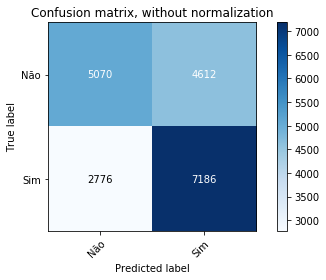

In [84]:
#Confusion Matrix
plot_confusion_matrix(y_test,y_pred_test, classes = ["Não", "Sim"])

Area under ROC curve = 0.62


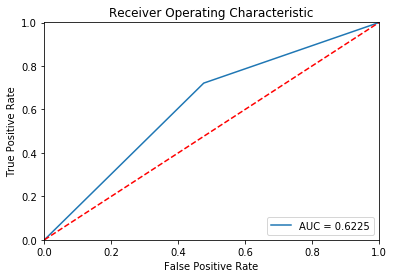

In [90]:
# ROC curve and Area-Under-Curve (AUC)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_test)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gb, tpr_gb, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [86]:
#plotando precisão, recall e f1-score:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.65      0.52      0.58      9682
           1       0.61      0.72      0.66      9962

   micro avg       0.62      0.62      0.62     19644
   macro avg       0.63      0.62      0.62     19644
weighted avg       0.63      0.62      0.62     19644



O modelo começa a ficar mais consistente.